# Project: Bank Marketing Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#model">Machine Learning</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

## Importing Libraries:

### Numpy: used for Numerical operation and array manipulation.
### Pandas: used for data manipulation and analysis.
### Plotly, Matplotlib, Seaborn: used for interactive data visualization.

In [70]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions. We will start with addressing General properties about the dataset.

### General Properties

In [71]:
# Load csv file named tmdb-movies.csv' into data frame DF
df = pd.read_csv('bank.csv', delimiter=',')

# dimensions of DF
print("Dimensions of DF: ")
print(df.shape)

# print Information of DF
print("\nInformation about DF: ")
df.info()

# First fifth rows of DF
print("\nHead of DF: \n")
df.head()

Dimensions of DF: 
(45211, 17)

Information about DF: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Head of DF: 


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

### The dataset appears to be related to marketing or customer interactions and related to a bank or financial institution.
### 1. age: Represents the age of the individual.
### 2. job: Describes the occupation or job of the person.
### 3. marital: Indicates the marital status of the person (e.g., married, single, divorced).
### 4. education: Represents the educational level of the person (e.g., primary(basic), secondary, tertiary(university).
### 5. default: Indicates whether the person has credit in default ('yes', 'no', or 'unknown').
### 6. balance: Balance of the individual.
### 7. housing: Shows whether the person has a housing loan ('yes', 'no', or 'unknown').
### 8. loan: Indicates whether the person has a personal loan ('yes', 'no', or 'unknown').
### 9. contact: Describes the method of communication used to contact the person (e.g., 'cellular', 'telephone').
### 10. month: Represents the month of the last contact.
### 11. day: Indicates the day of the week of the last contact.
### 12. duration: Represents the duration of the last contact in seconds.
### 13. campaign: Indicates the number of contacts made during this campaign.
### 14. pdays: Describes the number of days since the person was last contacted or -1 if they were not previously contacted.
### 15. previous: Represents the number of contacts made before this campaign.
### 16. poutcome: Indicates the outcome of the previous marketing campaign.
### 17. deposit: Indicates that a bank or a financial institution offers with a fixed rate

### Data Cleaning
Data cleaning is the process of fixing or removing incorrect, duplicate,noisy, or incomplete data within a dataset. 
Thorugh data cleaning phase, data wrangling has been conducted for modifying the data into a more usable form.

###### Read and Show Data

In [72]:
df = pd.read_csv('bank.csv', delimiter=',')

In [73]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
0          no  
1          no  
2          no  
3          no  
4          no  
...       ...  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no  

[45211 rows x 17 columns]

##### Collect information about data.

In [74]:
df['default'].value_counts(normalize=True)

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

In [75]:
df['job'].value_counts(normalize=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [76]:
df['education'].value_counts(normalize=False)

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [77]:
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      deposit  
45206     yes  
45207     yes  
45208     yes  
45209      no  
45210      no

In [78]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [79]:
df['poutcome'].value_counts(normalize=True)

poutcome
unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: proportion, dtype: float64

In [80]:
df['job'].value_counts(normalize=True)

job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: proportion, dtype: float64

###### Replace 'admin.' in job to 'admin'

In [81]:
df['job'] = df['job'].replace('admin.', 'admin')

###### In this section we will: Replace unknown to 'np.nan' to be easier to handle next.
###### Fill 'np.nan' by mode value of job.

In [82]:
df['job'].replace('unknown', np.nan, inplace=True)

In [83]:
df['job'].value_counts(normalize=True)

job
blue-collar      0.216637
management       0.210538
technician       0.169112
admin            0.115108
services         0.092469
retired          0.050397
self-employed    0.035149
entrepreneur     0.033101
unemployed       0.029005
housemaid        0.027603
student          0.020880
Name: proportion, dtype: float64

In [84]:
df['job'].fillna(df['job'].mode()[0], inplace=True)

In [85]:
df['education'].replace('unknown', np.nan, inplace=True)

In [86]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [87]:
df['contact'].replace('unknown', np.nan, inplace=True)
df['contact'].fillna(df['contact'].mode()[0], inplace=True)

In [88]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [89]:
df.drop(columns='pdays', axis=1, inplace=True)

In [90]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married  secondary      no     1506     yes   no   
4   33   blue-collar   single  secondary      no        1      no   no   

    contact  day month  duration  campaign  previous poutcome deposit  
0  cellular    5   may       261         1         0  unknown      no  
1  cellular    5   may       151         1         0  unknown      no  
2  cellular    5   may        76         1         0  unknown      no  
3  cellular    5   may        92         1         0  unknown      no  
4  cellular    5   may       198         1         0  unknown      no

###### Check NN values and modify it with a value (zero or mean or median or stay as it is according to the data)


In [91]:
# Display all information about columns on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  deposit    45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [92]:
df['balance'] = df['balance'].abs()


<a id='eda'></a>
## Exploratory Data Analysis

#### Descriptive statistics about DF

In [93]:
df.describe().T

count         mean          std   min    25%    50%     75%  \
age       45211.0    40.936210    10.618762  18.0   33.0   39.0    48.0   
balance   45211.0  1415.196081  3020.529906   0.0  137.0  485.0  1436.0   
day       45211.0    15.806419     8.322476   1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812   0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021   1.0    1.0    2.0     3.0   
previous  45211.0     0.580323     2.303441   0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
previous     275.0

From the above result, we get some important insights:
>1- The data has a wide range of values, as indicated by the standard deviation, which is larger than the mean for most of the columns.
>
>2- There are outliers in the data, as indicated by the minimum and maximum values. For example, the age column has a minimum value of 10.62 and a maximum value     of 45211.
>
>3- The data is right-skewed, as indicated by the fact that the median is less than the mean for most of the columns.

In [94]:
# df.to_csv('Cleaned_data.csv', index=False)

# Visualization

### Research Question 1: What is the age range at which clients are most likely to make deposits, and how does age influence deposit behavior.

In [95]:
fig=px.histogram(df , x='age',color='marital',marginal='box',nbins=30,
                 title='Distribution of Ages by Marital Status',
                 labels={'age': 'Age'} ,
                 category_orders={'marital': ['single', 'married', 'divorced']})
fig.update_layout(xaxis_title='Age' , yaxis_title='Count')
fig.show()

### Research Question 2: Relationship between maintaining a high balance and the likelihood of not having loans.

In [96]:
fig = px.scatter(df, x='balance', y='loan', color='loan', size='balance',
                 title='Scatter Plot of Balance Against Loan Status',
                 labels={'balance': 'Account Balance', 'loan': 'Loan Status'},
                 category_orders={'loan': ['no', 'yes']})

fig.update_layout(xaxis_title='Account Balance', yaxis_title='Loan Status')
fig.show()

### Research Question 3: Most common marital status among individuals who are likely to qualify for a house loan.

In [97]:
fig = px.histogram(df, x='marital', color='housing',
                   title='Relationship Between Housing Loan and Marital Status',
                   labels={'marital': 'Marital Status', 'housing': 'Housing Loan'},
                   category_orders={'marital': ['single', 'married', 'divorced'],
                                    'housing': ['no', 'yes']},
                   barmode='group')

fig.update_layout(xaxis_title='Marital Status', yaxis_title='Count')
fig.show()

### Research Question 4: Distribution of deposit status among customers with different education levels.

In [98]:
grouped_education_data = df.groupby('education')['deposit'].count().reset_index()
fig = px.bar(grouped_education_data, x='education', y='deposit', color='education')
fig.update_layout(title_text='Distribution of Deposits by Education levels')
fig.show()

### Research Question 5: Distribution of deposit status among customers with different jod types.

In [99]:
grouped_job_data = df.groupby('job')['deposit'].count().reset_index()
fig = px.bar(grouped_job_data, x='job', y='deposit', color='job')
fig.update_layout(title_text='Distribution of Deposits by Job')
fig.show()

    # ### Research Question 6: Displaying most important customers and their jobs.

In [100]:
fig = px.scatter(df, x='age', y='balance',color='job')
fig.update_layout(title_text='Relation between Age, Balance and Job')
fig.show()

### Research Question 7: Possibility of getting a loan according to balance. 

In [101]:
fig = px.scatter(df, x="age", y="balance", color="loan")
fig.update_layout(title="Hierarchical Clustering Results")
fig.show()

### Research Question 8: Relation between duration and deposit.

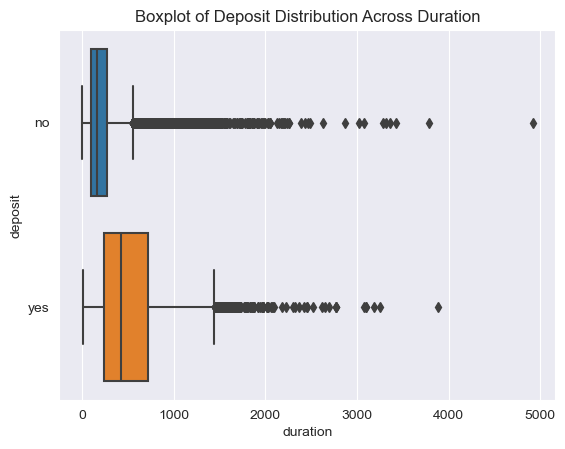

In [102]:
sns.boxplot(data=df, x="duration", y="deposit")
plt.title("Boxplot of Deposit Distribution Across Duration")
plt.show()

<a id='model'></a>
# Machine Learning

## Rain Forest(Random Forest Technique)
>1- Is build on Decision Tree algorithm.
>
>2- Consist of multiple trees(make forest) that are less sensitive to the training data.
>
>3- Rain forest algorithm is more accurate than Decision tree.
>
>4- Every tree in forest consist of pure leaf node and decision node. 
>
>5- We use random sampling with replacement to build number of datasets from original dataset (BootStrapping).
>
>6- Each tree will train on different bootstrapped dataset independently.
>
>7- We use Feature Selection to choose most suited feature to train each tree on it.
>
>8- Prediction of the rainforest is the one that receives the most votes.
> 
<li><a href="https://youtu.be/v6VJ2RO66Ag?si=6RKOpFwCqtp7r0Ik" target="_blank">Random Forest Algorithm</a></li>

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv('bank.csv', delimiter=',')

# Preprocess the data
# - Handle missing values
# - Convert categorical variables to numerical representation
# - Normalize/standardize numerical features

# Example: Handling missing values by dropping rows with missing values
data = data.dropna()

# Example: Convert categorical variables to numerical representation using LabelEncoder
label_encoder = LabelEncoder()
for column in ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "deposit"]:
    data[column] = label_encoder.fit_transform(data[column])

# Example: Standardize numerical features
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define target variable and features
X = data.drop("deposit", axis=1)  # Features
y = data["deposit"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9024624004718372


<a id='conclusions'></a>
## Conclusions

This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. These zero and null values hinders the analysis and have to be removed the rows that correspond to these zero and null values.
Some key observations:
>1- The individuals range in age from 33 to 58.
>
>2- The most common job titles are management, technician, and entrepreneur.
>
>3- All individuals except one are married.
>
>4- The most common education level is secondary. 
>
>5- vThe majority of individuals have no default history.
>
>6- The average balance is around 700.
>
>7- Most individuals have a housing loan but not a personal loan.
>
>8- The most common contact type is unknown.
>